In [4]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [5]:
#import data
deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
#as the team name was changed making changes in the data for accurate anaylysis
deliveries = deliveries.replace('Delhi Daredevils', 'Delhi Capitals')


In [9]:
matches = pd.read_csv('matches.csv')

#as hyderabad old team was named as Deccan chargers lets do the needful change
matches = matches.replace({'Delhi Daredevils': 'Delhi Capitals'})

In [10]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

# Q1. Who will win the match? (RCB / KXIP)

In [11]:
#checking total matches played by rcb
matches_rcb = matches[(matches['team1']=='Royal Challengers Bangalore')|(matches['team2']=='Royal Challengers Bangalore')]

wins_rcb = np.sum(matches_rcb.winner == 'Royal Challengers Bangalore')

print("Total matches played by rcb:", matches_rcb.shape[0])
print("Total matches won by rcb:", wins_rcb)
print("rcb winning percentage:", (wins_rcb/matches_rcb.shape[0]*100))

Total matches played by rcb: 180
Total matches won by rcb: 84
rcb winning percentage: 46.666666666666664


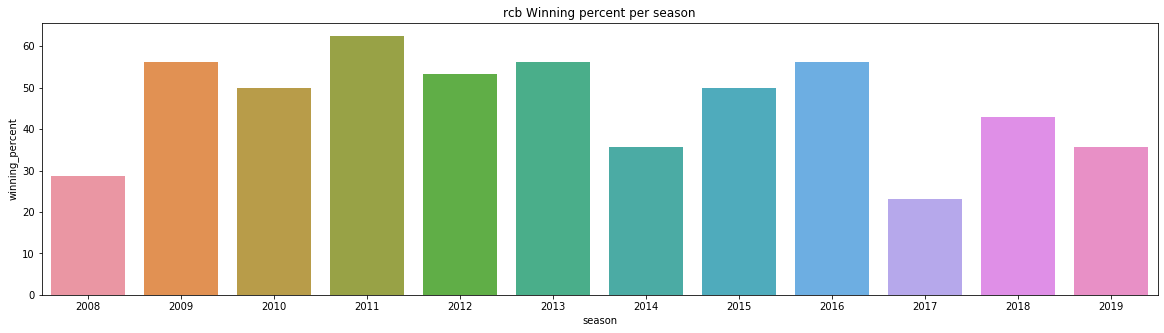

In [12]:
#checking RCB matches winning percentage per season

rcb_wins = matches_rcb[matches_rcb.winner == 'Royal Challengers Bangalore']
# matches['season'].unique()
rcb_season_wins = rcb_wins.groupby('season')['winner'].count().reset_index()
rcb_season_wins['total_matches_rcb']=matches_rcb.groupby('season')['id'].count().values
rcb_season_wins['winning_percent']= (rcb_season_wins.winner/rcb_season_wins.total_matches_rcb)*100

plt.figure(figsize=(20,5))
sns.barplot(x=rcb_season_wins['season'], y = rcb_season_wins['winning_percent'])
plt.title("rcb Winning percent per season")
plt.show()

In [13]:
#checking total matches played by KXIP
matches_kxip = matches[(matches['team1']=='Kings XI Punjab')|(matches['team2']=='Kings XI Punjab')]

wins_kxip = np.sum(matches_kxip.winner == 'Kings XI Punjab')

print("Total matches played by kxip:", matches_kxip.shape[0])
print("Total matches won by kxip:", wins_kxip)
print("kxip winning percentage:", (wins_kxip/matches_kxip.shape[0]*100))

Total matches played by kxip: 176
Total matches won by kxip: 82
kxip winning percentage: 46.590909090909086


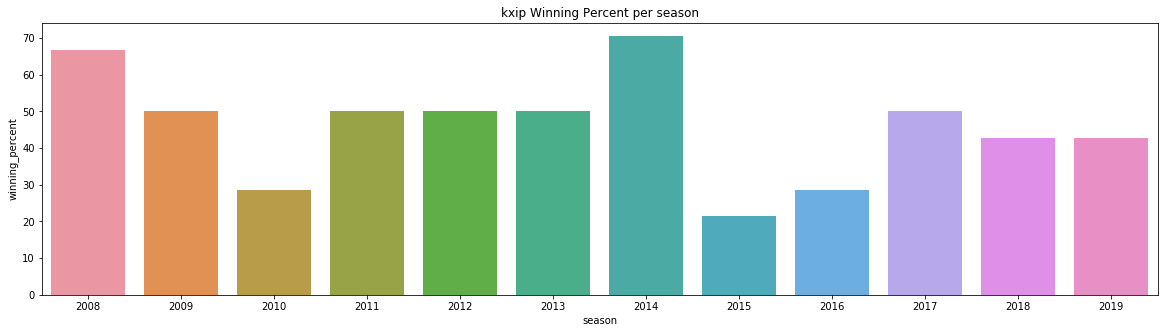

In [14]:
#checking Kings XI Punjab matches winning percentage per season

kxip_wins = matches_kxip[matches_kxip.winner == 'Kings XI Punjab']
# matches['season'].unique()
kxip_season_wins = kxip_wins.groupby('season')['winner'].count().reset_index()
kxip_season_wins['total_matches_kxip']=matches_kxip.groupby('season')['id'].count().values
kxip_season_wins['winning_percent']= (kxip_season_wins.winner/kxip_season_wins.total_matches_kxip)*100

plt.figure(figsize=(20,5))
sns.barplot(x=kxip_season_wins['season'], y = kxip_season_wins['winning_percent'])
plt.title('kxip Winning Percent per season')
plt.show()

In [15]:
#checking matches between 'RCB' and 'KXIP'
matches_rcb_kxip = matches[((matches['team1']=='Royal Challengers Bangalore')&(matches['team2']=='Kings XI Punjab'))|((matches['team2']=='Royal Challengers Bangalore')&(matches['team1']=='Kings XI Punjab'))]
matches_rcb_kxip.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
41,42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin,NaN
83,84,2008,Bangalore,2008-05-05,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,S Sreesanth,M Chinnaswamy Stadium,SJ Davis,BR Doctrove,NaN
93,94,2008,Chandigarh,2008-05-12,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,9,SE Marsh,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,I Shivram,NaN
126,127,2009,Durban,2009-04-24,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,7,RS Bopara,Kingsmead,BR Doctrove,TH Wijewardene,NaN


season  winner                     
2008    Kings XI Punjab                100.0
2009    Kings XI Punjab                 50.0
        Royal Challengers Bangalore     50.0
2010    Royal Challengers Bangalore    100.0
2011    Kings XI Punjab                 50.0
        Royal Challengers Bangalore     50.0
2012    Kings XI Punjab                 50.0
        Royal Challengers Bangalore     50.0
2013    Kings XI Punjab                100.0
2014    Kings XI Punjab                100.0
2015    Kings XI Punjab                 50.0
        Royal Challengers Bangalore     50.0
2016    Royal Challengers Bangalore    100.0
2017    Kings XI Punjab                100.0
2018    Royal Challengers Bangalore    100.0
2019    Royal Challengers Bangalore    100.0
Name: winner, dtype: float64

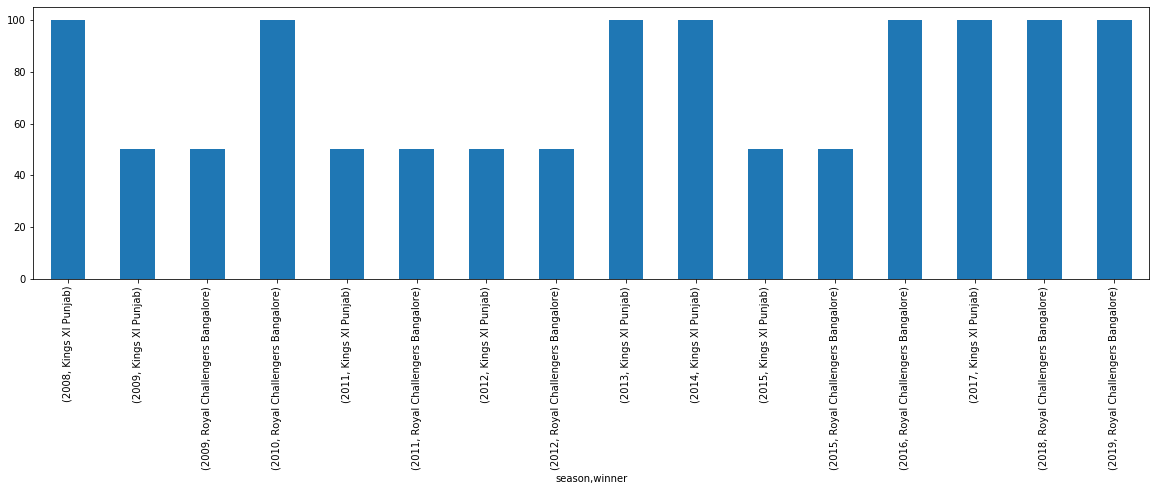

In [16]:
#Now lets see how RCB has performed over KXIP


res = matches_rcb_kxip.groupby('season')['winner'].value_counts(normalize=True)*100
display(res)

plt.figure(figsize=(20,5))
res.plot(kind='bar')
plt.show()

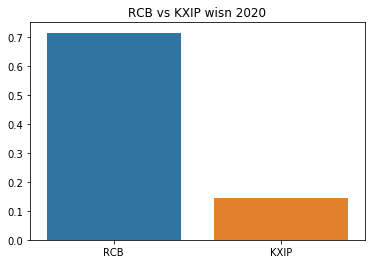

In [17]:
#2020 
win_2020_RCB = 5/7
win_2020_KXIP = 1/7

win_2020_RCB, win_2020_KXIP
plt.title("RCB vs KXIP wisn 2020")
sns.barplot(['RCB', 'KXIP'], [win_2020_RCB, win_2020_KXIP])

**Inference:**
    From the graphs above we can clearly see that RCB has very high winning percentage over KXIP. Also in season 2020 RCB seems to be in a better form than KXIP. however KXIP has a desperate need for more points, so they definitely are going to try very hard. Also in the last match with KXIP vs RCB KXIP won the match, so RCB might want to get the defeat. 

# Q2. How many wickets will KXIP loose in a match?

In [24]:
#getting all matches where KIXP is batting and fielding
kxipb_rcbf = deliveries[(deliveries.batting_team=='Kings XI Punjab')&(deliveries.bowling_team=='Royal Challengers Bangalore')]
kxipb_rcbf

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1801,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,1,M Vohra,HM Amla,B Stanlake,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1802,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,2,M Vohra,HM Amla,B Stanlake,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1803,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,3,HM Amla,M Vohra,B Stanlake,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1804,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,4,HM Amla,M Vohra,B Stanlake,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1805,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,5,HM Amla,M Vohra,B Stanlake,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1806,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,6,M Vohra,HM Amla,B Stanlake,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1807,8,2,Kings XI Punjab,Royal Challengers Bangalore,2,1,HM Amla,M Vohra,Iqbal Abdulla,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
1808,8,2,Kings XI Punjab,Royal Challengers Bangalore,2,2,HM Amla,M Vohra,Iqbal Abdulla,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1809,8,2,Kings XI Punjab,Royal Challengers Bangalore,2,3,HM Amla,M Vohra,Iqbal Abdulla,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1810,8,2,Kings XI Punjab,Royal Challengers Bangalore,2,4,M Vohra,HM Amla,Iqbal Abdulla,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [36]:
#getting rows where wickets were taken
totw_kxipb_rcbf = kxipb_rcbf[kxipb_rcbf.player_dismissed.notnull()].groupby('match_id')['player_dismissed'].count()


totw_kxipb_rcbf.describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
player_dismissed,24,5.625,2.73166,1,3.75,5.5,7.25,10


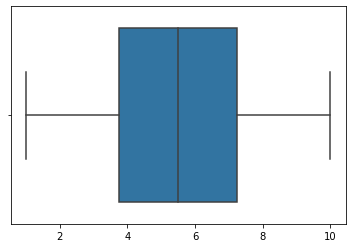

In [37]:
sns.boxplot(totw_kxipb_rcbf.values)

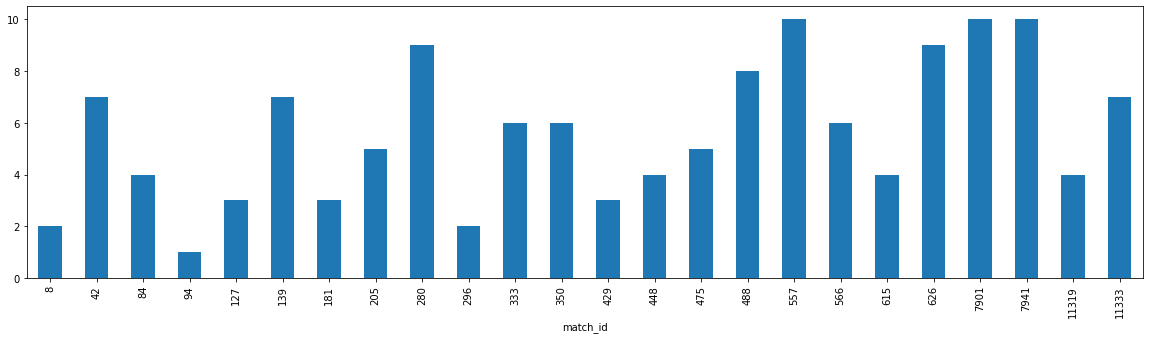

In [23]:
#checking visually
totw_kxipb_rcbf.plot(kind='bar', figsize=(20,5))

**Inference:**
    
    - We can see that as per the trend KXIP has lost more than 5 wickets on an average when playing against RCB, so we can predict they might loose over 6-8 wickets in the match.

# Q3. How many runs partnership will Virat Kohli and AB De Villers put up?

In [102]:
#getting all rows where Virat kohli and AB DE Villers 
tot_vk_abdv = deliveries[((deliveries.batsman=='V Kohli')&(deliveries.non_striker=='AB de Villiers'))|((deliveries.non_striker=='V Kohli')&(deliveries.batsman=='AB de Villiers'))]

#counting total runs scored by virat kohli and AB De villers together
runs_vk_abdv = tot_vk_abdv.groupby('match_id')['batsman_runs'].sum()

#basic statistics for runs scored
runs_vk_abdv.describe()

count     68.000000
mean      40.779412
std       48.724276
min        0.000000
25%        7.000000
50%       23.500000
75%       53.750000
max      226.000000
Name: batsman_runs, dtype: float64

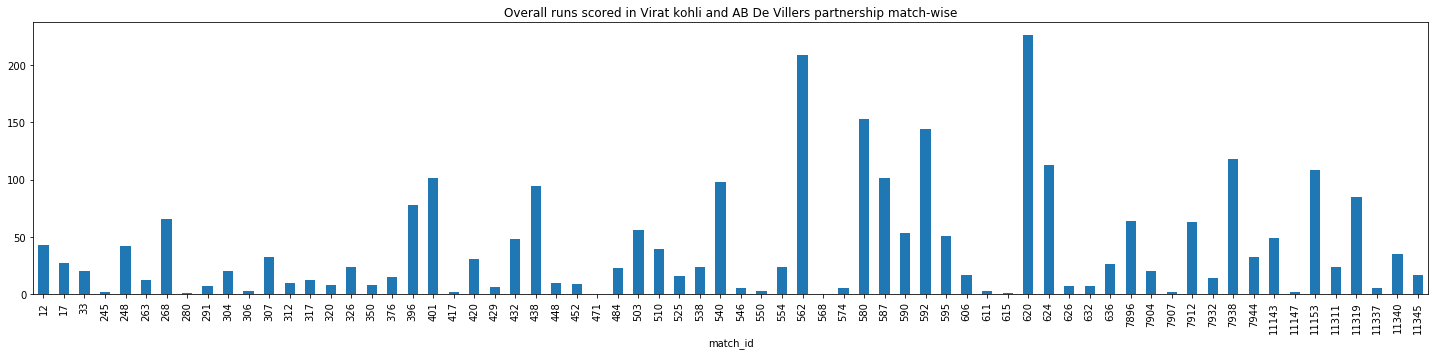

In [108]:
runs_vk_abdv.plot(kind='bar', figsize=(25,5))
plt.title("Overall runs scored in Virat kohli and AB De Villers partnership match-wise")
plt.show()

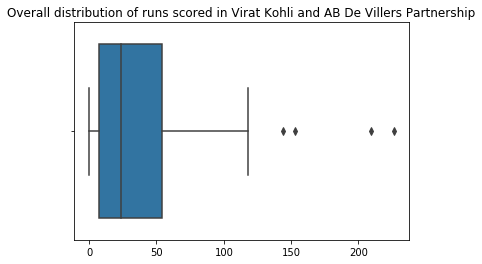

In [109]:
sns.boxplot(runs_vk_abdv.values)
plt.title("Overall distribution of runs scored in Virat Kohli and AB De Villers Partnership")
plt.show()

**Inference:**
    - Both Kohli and Villers are amazing batsman and make a wonderful duo and complement each others performance. They have had few outstanding performances but on average the duo has scored around 23 runs. so it will be safe to say they will score (26-40) runs

# Q4. How many 6s will be hit in the match?

In [75]:
#getting all matches  between rcb vs kxip
tot_rcb_kxip = deliveries[((deliveries.batting_team=='Royal Challengers Bangalore')&(deliveries.batting_team=='Kings XI Punjab'))|((deliveries.batting_team=='Royal Challengers Bangalore')&(deliveries.bowling_team=='Kings XI Punjab'))]

#getting total 6's scored  by both teams
tot6_rcb_kxip = tot_rcb_kxip[tot_rcb_kxip.batsman_runs==6]

#counting total 6's match wise
match6_rcb_kxip = tot6_rcb_kxip.groupby('match_id')['batsman_runs'].count()

match6_rcb_kxip.reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
match_id,8,42,84,94,127,139,181,205,280,296,333,350,429,448,475,488,557,566,615,626,7901,7941,11319,11333
batsman_runs,11,3,1,2,5,5,13,4,11,4,4,8,9,6,4,9,18,2,3,16,5,2,2,12


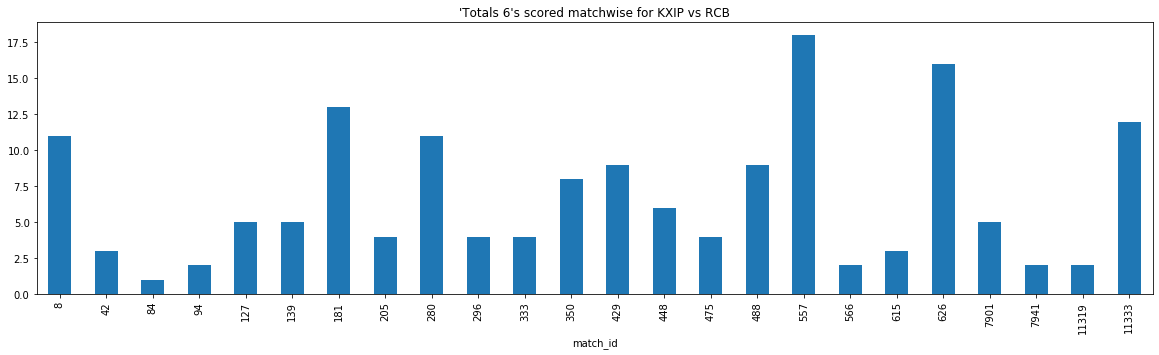

In [82]:
#Totals 6's scored matchwise for KXIP vs RCB
match6_rcb_kxip.plot(kind='bar', figsize=(20,5))
plt.title("'Totals 6's scored matchwise for KXIP vs RCB")
plt.show()

In [92]:
#basic statistics of RCB vs KXIP
match6_rcb_kxip.describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
batsman_runs,24,6.625,4.74399,1,3,5,9.5,18


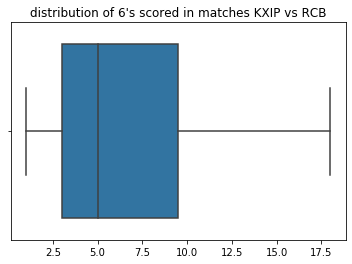

In [83]:
#overall distribution of 6's scored in matches KXIP vs RCB
sns.boxplot(match6_rcb_kxip.values)
plt.title("distribution of 6's scored in matches KXIP vs RCB")
plt.show()

**Inference:**
    - if we see on an average KXIP and RCB together score on average 6 6's in the match however the number may be slightly higher 6-10 6's in the match.

# Q5. How many no-balls will be bowled in the match?

In [39]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [40]:
deliveries['noball_runs'].value_counts()

0    178364
1       698
2         9
5         6
3         1
Name: noball_runs, dtype: int64

In [41]:
noball_bowls = deliveries[deliveries.noball_runs!=0]

#counting noball bowls during a match
noball_bowls.groupby('match_id')['ball'].count().head()

match_id
1     2
7     3
10    1
11    2
12    1
Name: ball, dtype: int64

In [47]:
 #checking noball bowls only when RCB is playing
nb_rcb = noball_bowls[(noball_bowls.batting_team=='Royal Challengers Bangalore')|(noball_bowls.bowling_team=='Royal Challengers Bangalore')]

nb_rcb.groupby('match_id')['ball'].count().head()

match_id
1     2
12    1
27    2
30    2
55    1
Name: ball, dtype: int64

In [48]:
nb_rcb_count = nb_rcb.groupby('match_id')['ball'].count().values

print(f'Average noball bowls by Royal Challengers Bangalore in a match: {np.mean(nb_rcb_count)}')
print(f'Median  noball bowls by Royal Challengers Bangalore in a match: {np.median(nb_rcb_count)}')
print(f'Minimum  noball bowls by Royal Challengers Bangalore in a match: {np.min(nb_rcb_count)}')
print(f'Maximum  noball bowls by Royal Challengers Bangalore in a match: {np.max(nb_rcb_count)}')

Average noball bowls by Royal Challengers Bangalore in a match: 1.6339285714285714
Median  noball bowls by Royal Challengers Bangalore in a match: 1.0
Minimum  noball bowls by Royal Challengers Bangalore in a match: 1
Maximum  noball bowls by Royal Challengers Bangalore in a match: 5


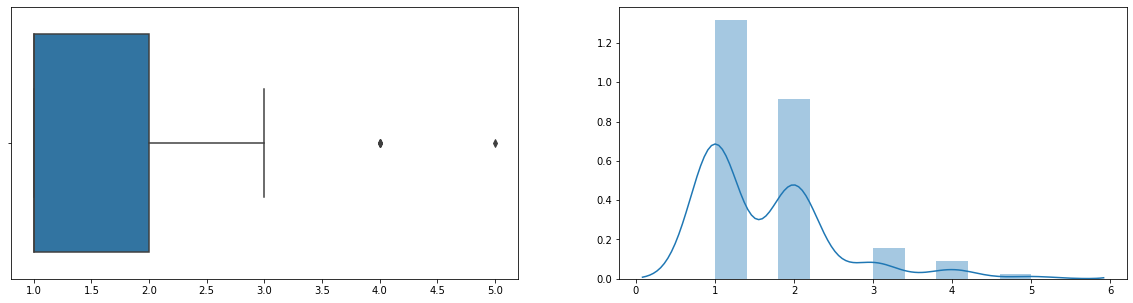

In [49]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_rcb_count, ax = ax[0])
sns.distplot(nb_rcb_count, ax=ax[1])

In [52]:
#checking noball bowls only when kxip is playing
nb_kxip = noball_bowls[(noball_bowls.batting_team=='Kings XI Punjab')|(noball_bowls.bowling_team=='Kings XI Punjab')]

nb_kxip.groupby('match_id')['ball'].count().head()

match_id
11    2
15    3
19    1
22    2
32    1
Name: ball, dtype: int64

In [53]:
nb_kxip_count = nb_kxip.groupby('match_id')['ball'].count().values

print(f'Average wide bowls by Kings XI Punjab in a match: {np.mean(nb_kxip_count)}')
print(f'Median  wide bowls by Kings XI Punjab in a match: {np.median(nb_kxip_count)}')
print(f'Minimum  wide bowls by Kings XI Punjab in a match: {np.min(nb_kxip_count)}')
print(f'Maximum  wide bowls by Kings XI Punjab in a match: {np.max(nb_kxip_count)}')

Average wide bowls by Kings XI Punjab in a match: 1.7666666666666666
Median  wide bowls by Kings XI Punjab in a match: 1.0
Minimum  wide bowls by Kings XI Punjab in a match: 1
Maximum  wide bowls by Kings XI Punjab in a match: 5


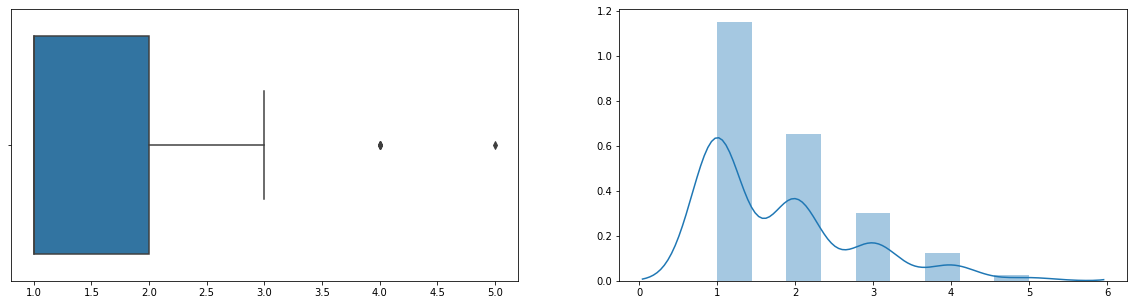

In [54]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_kxip_count, ax = ax[0])
sns.distplot(nb_kxip_count, ax=ax[1])


In [55]:
#lets also check the matches played between rcb and kxip
nb_rcb_kxip = noball_bowls[((noball_bowls.batting_team=='Delhi Capitals')&(noball_bowls.bowling_team=='Rajasthan Royals'))|((noball_bowls.batting_team=='Rajasthan Royals')&(noball_bowls.bowling_team=='Delhi Capitals'))]

nb_rcb_kxip.groupby('match_id')['ball'].count()

match_id
93       3
133      2
165      5
203      1
241      3
498      1
11331    1
Name: ball, dtype: int64

In [62]:
nb_rcbkxip = nb_rcb_kxip.groupby('match_id')['ball'].count()

print(f'Average noball bowls in (rcb and kxip) match: {np.mean(nb_rcbkxip)}')
print(f'Median  noball bowls in (rcb and kxip) match: {np.median(nb_rcbkxip)}')
print(f'Minimum  noball bowls in (rcb and kxip) match: {np.min(nb_rcbkxip)}')
print(f'Maximum  noball bowls in (rcb and kxip) match: {np.max(nb_rcbkxip)}')

Average noball bowls in (rcb and kxip) match: 2.2857142857142856
Median  noball bowls in (rcb and kxip) match: 2.0
Minimum  noball bowls in (rcb and kxip) match: 1
Maximum  noball bowls in (rcb and kxip) match: 5


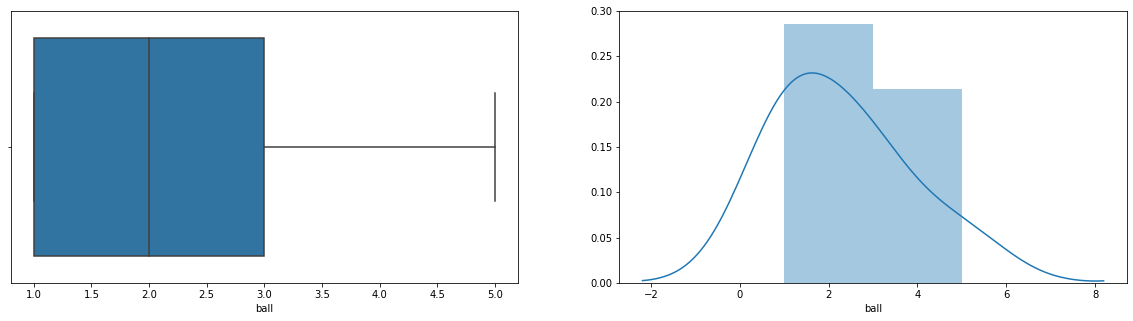

In [60]:
#chekcing visually
fig, ax = plt.subplots(1,2 , figsize=(20,5))

sns.boxplot(nb_rcbkxip, ax = ax[0])
sns.distplot(nb_rcbkxip, ax=ax[1])

**Inference:**
    - We can see very few noballs were bowled during matches of KXIP and RCB on average about 2, well as per google noball is an illegal delivery of a ball, and as both teams have very experienced player probability of them bowling noballs is pretty less. Hence going with option (1-2) just to be safe.

In [115]:
a=10
b=20

a,b

(10, 20)

In [117]:
(a & b) &(b&a)

0